# 1.	Data Pre-processing

#Import Libraries

In [24]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Import Data




Load and clean the dataset.

In [25]:
df = pd.read_csv(r'/content/Car_sale_ads.csv.zip')
df.head()

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


# Under Standing the data

In [26]:
df.shape

(208304, 25)

In [27]:
df.dtypes

Index                        int64
Price                        int64
Currency                    object
Condition                   object
Vehicle_brand               object
Vehicle_model               object
Vehicle_version             object
Vehicle_generation          object
Production_year              int64
Mileage_km                 float64
Power_HP                   float64
Displacement_cm3           float64
Fuel_type                   object
CO2_emissions              float64
Drive                       object
Transmission                object
Type                        object
Doors_number               float64
Colour                      object
Origin_country              object
First_owner                 object
First_registration_date     object
Offer_publication_date      object
Offer_location              object
Features                    object
dtype: object

#Removing duplicates from data

Handle missing data and outliers.

In [28]:
df.duplicated().sum()

0

In [29]:
# Remove the duplicates from the dataset
df.drop_duplicates(inplace=True)

In [30]:
# check the shape of the dataset
df.shape

(208304, 25)

## Exploratory Data Analysis

# Statistical Distribution

In [31]:
df.describe()

,Index,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,CO2_emissions,Doors_number
count,208304.000000,2.083040e+05,208304.000000,2.073210e+05,207661.000000,206338.000000,9.404700e+04,206817.000000
mean,104151.500000,6.305383e+04,2012.098241,1.502768e+05,151.836281,1882.567147,3.191564e+05,4.637138
std,60132.329574,8.665967e+04,6.998414,2.937447e+06,77.683546,729.609660,7.291396e+07,0.768559
min,0.000000,5.000000e+02,1915.000000,1.000000e+00,1.000000,400.000000,1.000000e+00,1.000000
25%,52075.750000,1.780000e+04,2008.000000,5.300000e+04,105.000000,1461.000000,1.200000e+02,5.000000
50%,104151.500000,3.570000e+04,2013.000000,1.445660e+05,136.000000,1798.000000,1.400000e+02,5.000000
75%,156227.250000,7.599000e+04,2017.000000,2.060000e+05,172.000000,1997.000000,1.640000e+02,5.000000
max,208303.000000,6.999000e+06,2021.000000,1.111111e+09,1398.000000,8400.000000,2.000000e+10,55.000000


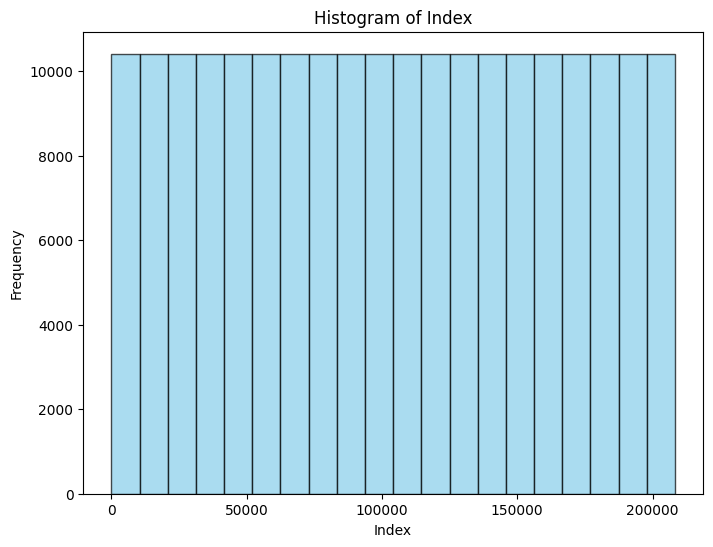

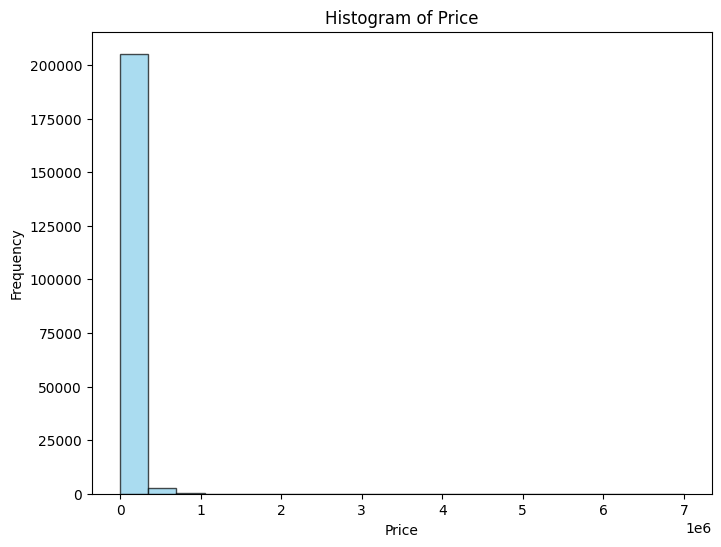

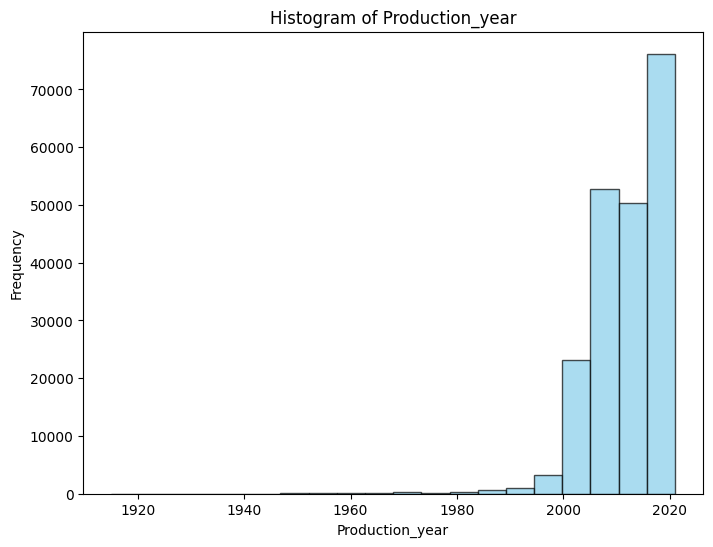

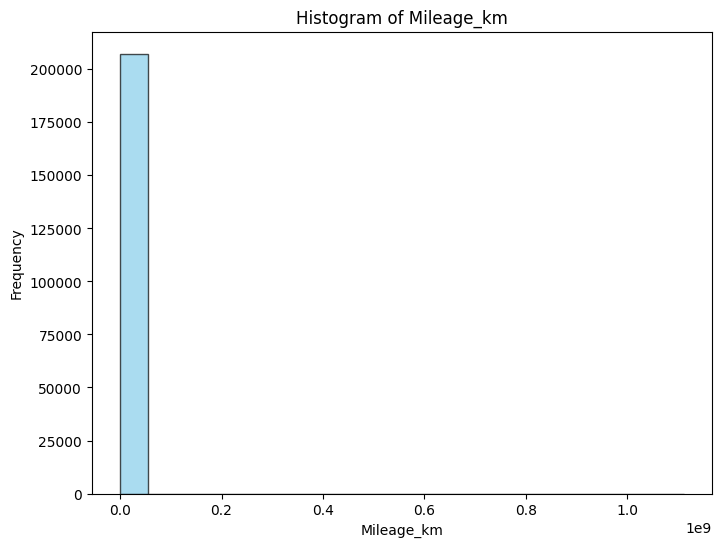

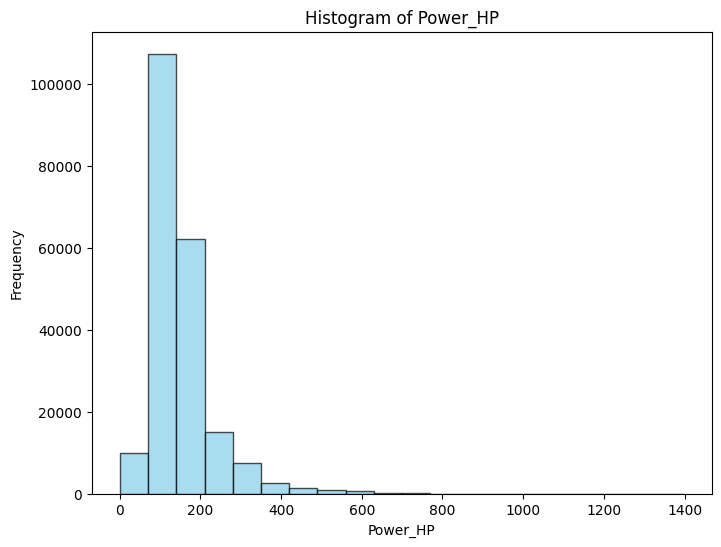

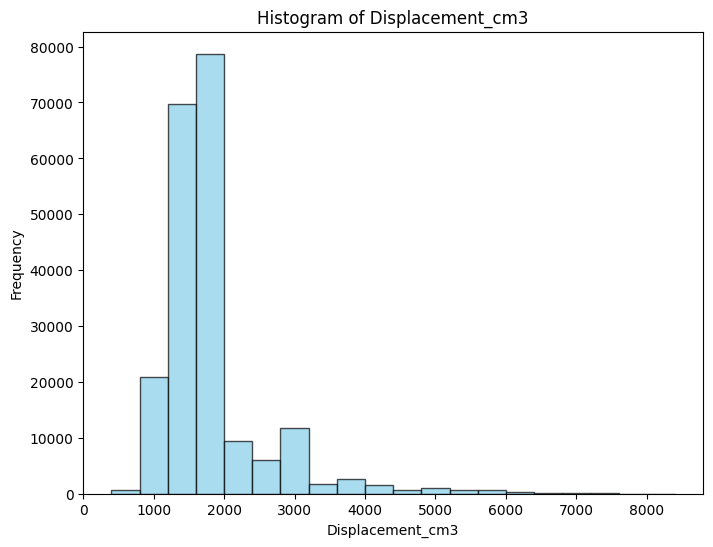

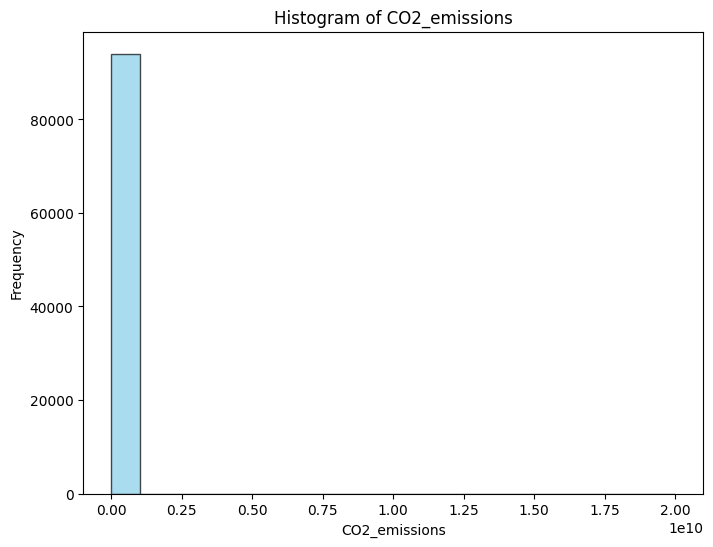

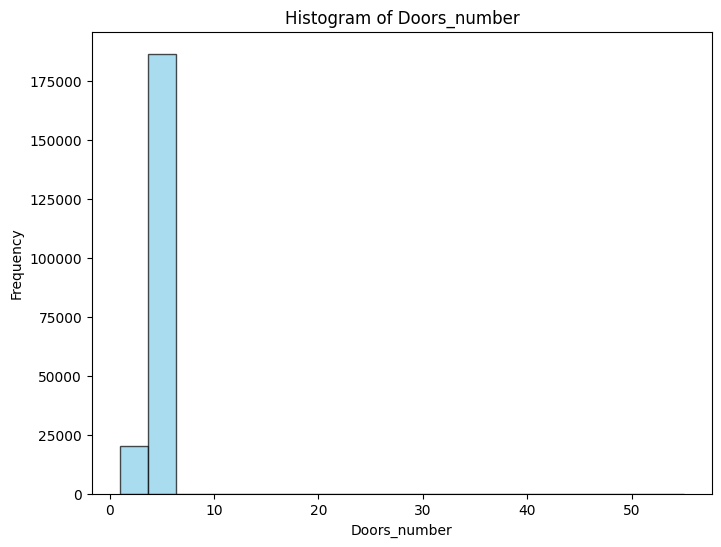

In [32]:
import matplotlib.pyplot as plt

# Filter numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    df[col].hist(bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()


               Index         Price  Production_year    Mileage_km  \
count  208304.000000  2.083040e+05    208304.000000  2.073210e+05   
mean   104151.500000  6.305383e+04      2012.098241  1.502768e+05   
std     60132.329574  8.665967e+04         6.998414  2.937447e+06   
min         0.000000  5.000000e+02      1915.000000  1.000000e+00   
25%     52075.750000  1.780000e+04      2008.000000  5.300000e+04   
50%    104151.500000  3.570000e+04      2013.000000  1.445660e+05   
75%    156227.250000  7.599000e+04      2017.000000  2.060000e+05   
max    208303.000000  6.999000e+06      2021.000000  1.111111e+09   

            Power_HP  Displacement_cm3  CO2_emissions   Doors_number  
count  207661.000000     206338.000000   9.404700e+04  206817.000000  
mean      151.836281       1882.567147   3.191564e+05       4.637138  
std        77.683546        729.609660   7.291396e+07       0.768559  
min         1.000000        400.000000   1.000000e+00       1.000000  
25%       105.000000   

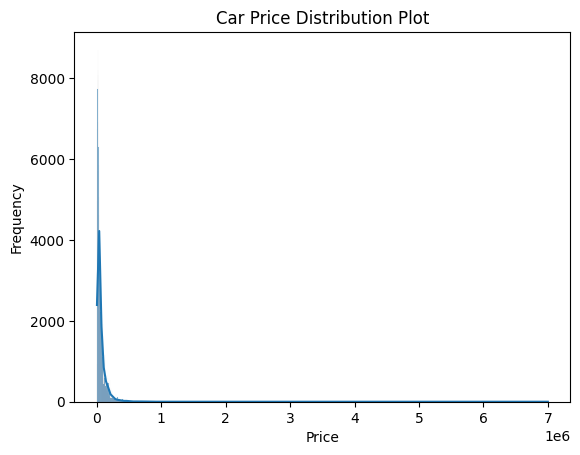

In [33]:
# Summary statistics
print(df.describe())

# Distribution plot of 'Price'
sns.histplot(df['Price'], kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Car Price Distribution Plot')
plt.show()


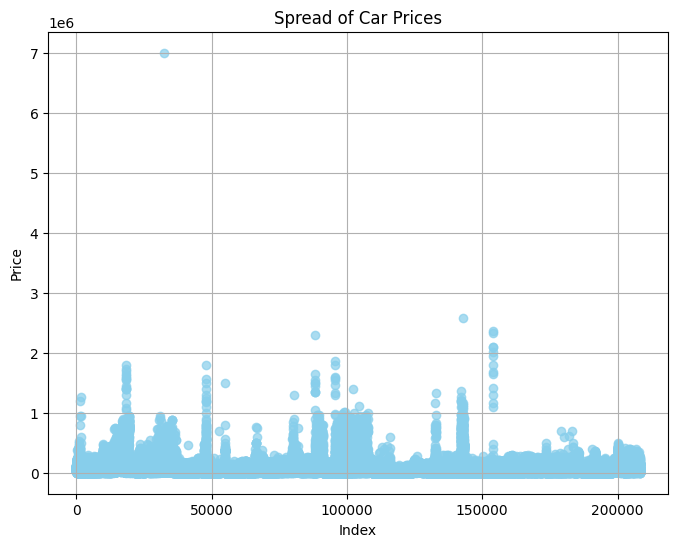

In [34]:
import matplotlib.pyplot as plt

# Scatter plot of car price
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['Price'], color='skyblue', alpha=0.7)
plt.title('Spread of Car Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### Categorical Data Analysis

In [35]:
import pandas as pd

# Print column names
print(df.columns)


Index(['Index', 'Price', 'Currency', 'Condition', 'Vehicle_brand',
       'Vehicle_model', 'Vehicle_version', 'Vehicle_generation',
       'Production_year', 'Mileage_km', 'Power_HP', 'Displacement_cm3',
       'Fuel_type', 'CO2_emissions', 'Drive', 'Transmission', 'Type',
       'Doors_number', 'Colour', 'Origin_country', 'First_owner',
       'First_registration_date', 'Offer_publication_date', 'Offer_location',
       'Features'],
      dtype='object')


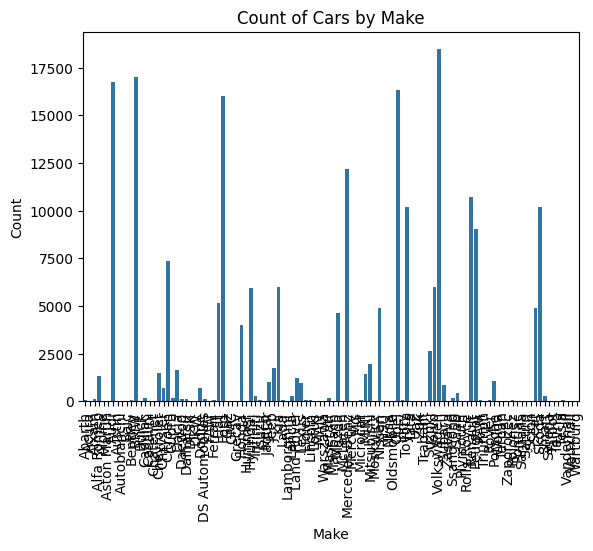

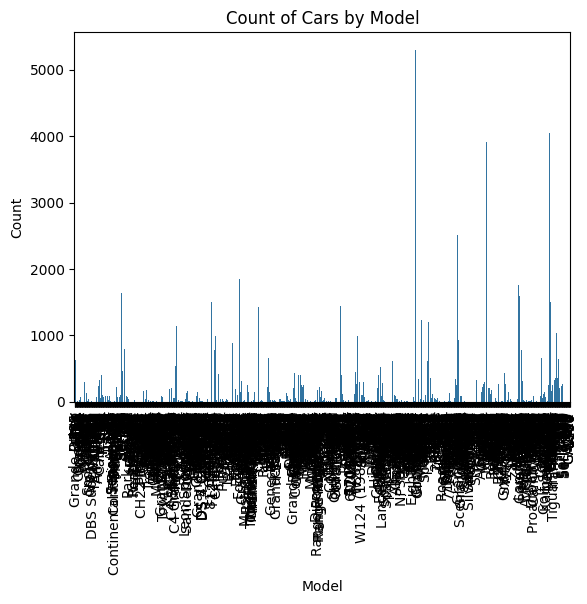

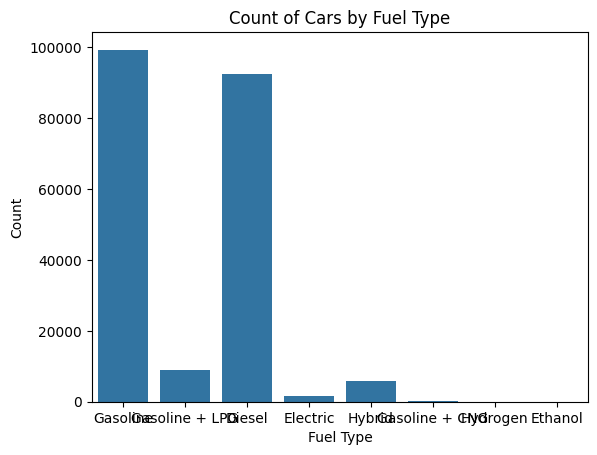

In [36]:

# Count plot for 'make'
sns.countplot(data=df, x='Vehicle_brand')  # Assuming 'Vehicle_brand' represents 'make'
plt.xticks(rotation=90)
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Count of Cars by Make')
plt.show()

# Count plot for 'model'
sns.countplot(data=df, x='Vehicle_model')  # Assuming 'Vehicle_model' represents 'model'
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Count')
plt.title('Count of Cars by Model')
plt.show()

# Count plot for 'fuelType'
sns.countplot(data=df, x='Fuel_type')  # Assuming 'Fuel_type' represents 'fuelType'
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Count of Cars by Fuel Type')
plt.show()


Null Values Analysis

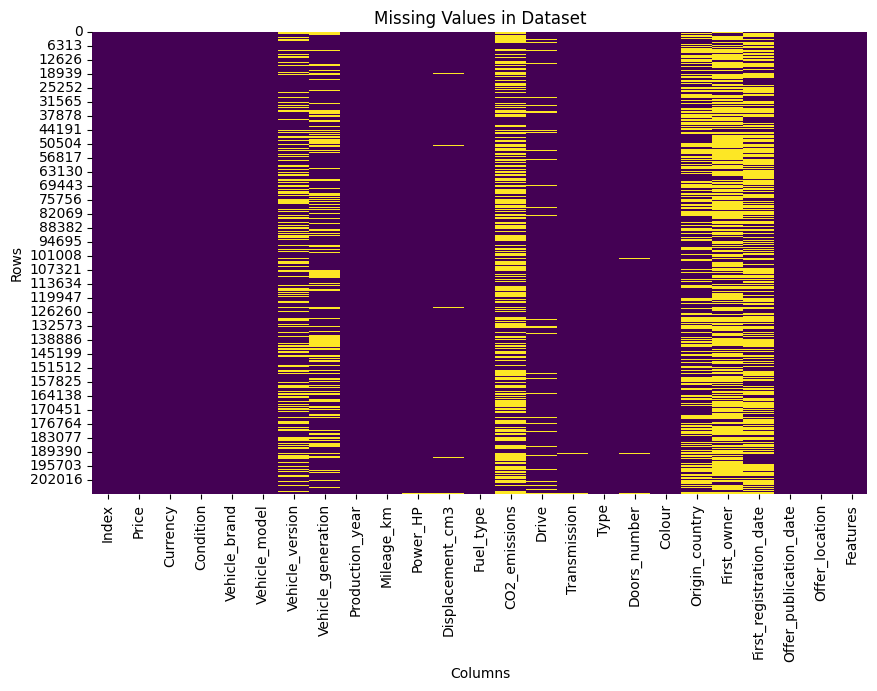

In [37]:
# Create a heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values in Dataset')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

# Numerical Data Analysis

In [38]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Car_sale_ads.csv.zip')

# Summary statistics for numerical columns
numeric_summary_stats = df.select_dtypes(include=['number']).describe()
print("Summary Statistics:")
print(numeric_summary_stats)

# Median for each numerical column
medians = df.select_dtypes(include=['number']).median()
print("\nMedians:")
print(medians)

# Variance for each numerical column
variances = df.select_dtypes(include=['number']).var()
print("\nVariances:")
print(variances)

# Correlation matrix for numerical columns
correlation_matrix = df.select_dtypes(include=['number']).corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Covariance matrix for numerical columns
covariance_matrix = df.select_dtypes(include=['number']).cov()
print("\nCovariance Matrix:")
print(covariance_matrix)

Summary Statistics:
               Index         Price  Production_year    Mileage_km  \
count  208304.000000  2.083040e+05    208304.000000  2.073210e+05   
mean   104151.500000  6.305383e+04      2012.098241  1.502768e+05   
std     60132.329574  8.665967e+04         6.998414  2.937447e+06   
min         0.000000  5.000000e+02      1915.000000  1.000000e+00   
25%     52075.750000  1.780000e+04      2008.000000  5.300000e+04   
50%    104151.500000  3.570000e+04      2013.000000  1.445660e+05   
75%    156227.250000  7.599000e+04      2017.000000  2.060000e+05   
max    208303.000000  6.999000e+06      2021.000000  1.111111e+09   

            Power_HP  Displacement_cm3  CO2_emissions   Doors_number  
count  207661.000000     206338.000000   9.404700e+04  206817.000000  
mean      151.836281       1882.567147   3.191564e+05       4.637138  
std        77.683546        729.609660   7.291396e+07       0.768559  
min         1.000000        400.000000   1.000000e+00       1.000000  
25%

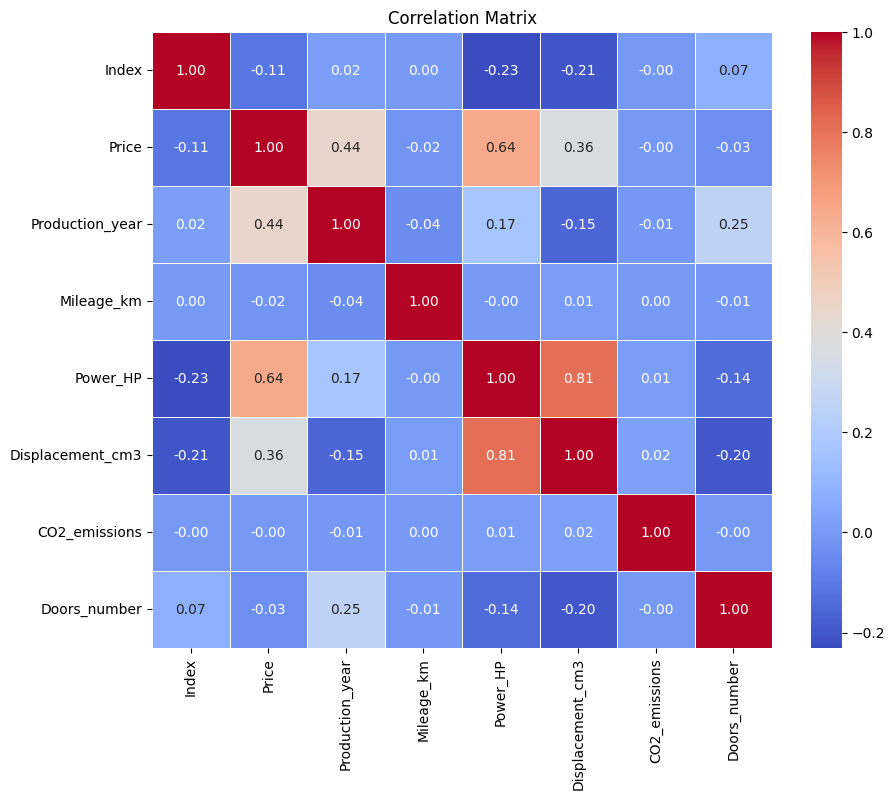

In [39]:
# Exclude non-numeric columns from DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


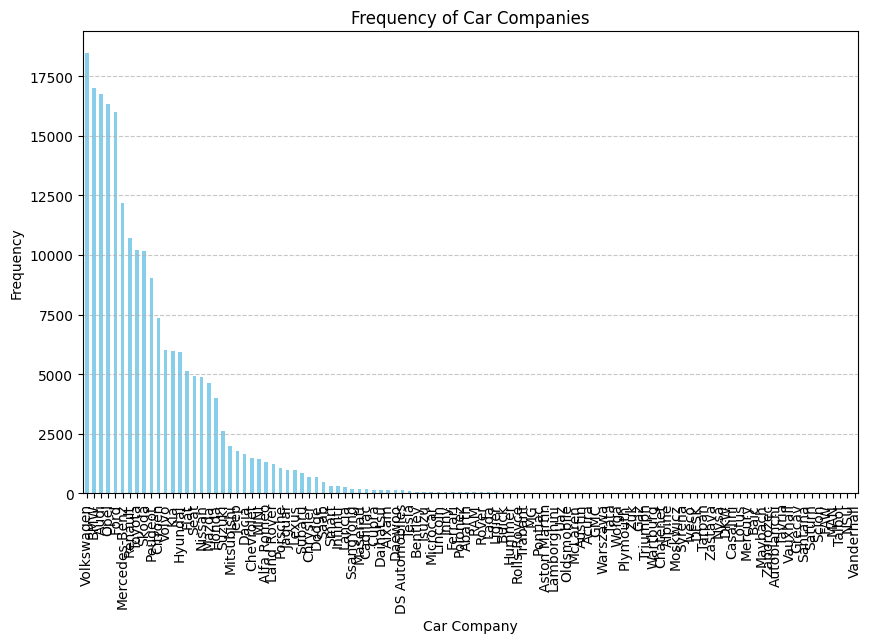

In [40]:
# Extract the 'Vehicle_brand' column
car_companies = df['Vehicle_brand']

# Count the frequency of each car company
company_counts = car_companies.value_counts()

# Plot histogram of car company frequencies
plt.figure(figsize=(10, 6))
company_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Car Companies')
plt.xlabel('Car Company')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

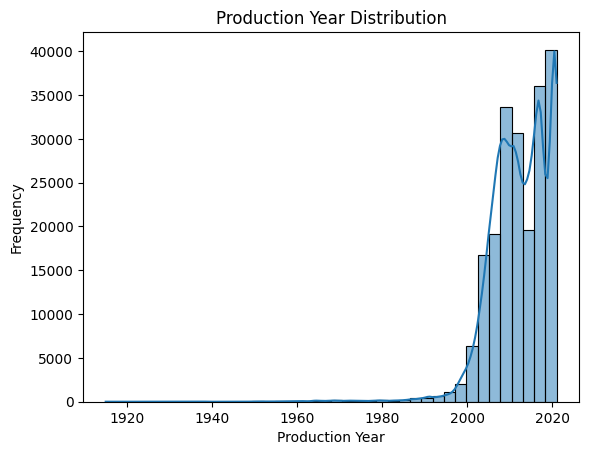

In [41]:
# Example of distribution analysis for 'Production_year'
sns.histplot(df['Production_year'], bins=40, kde=True)
plt.xlabel('Production Year')
plt.ylabel('Frequency')
plt.title('Production Year Distribution')
plt.show()

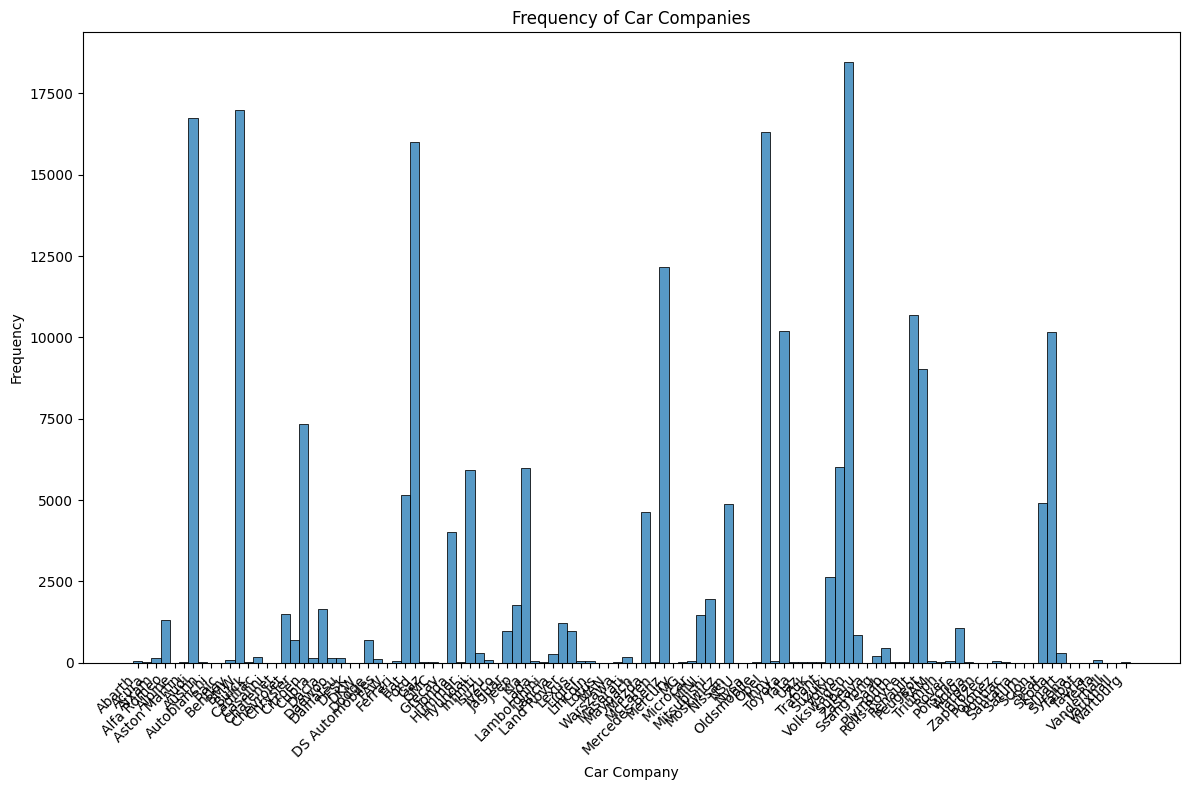

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the histogram of car companies
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Vehicle_brand', bins=len(df['Vehicle_brand'].unique()), discrete=True)
plt.xlabel('Car Company')
plt.ylabel('Frequency')
plt.title('Frequency of Car Companies')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()


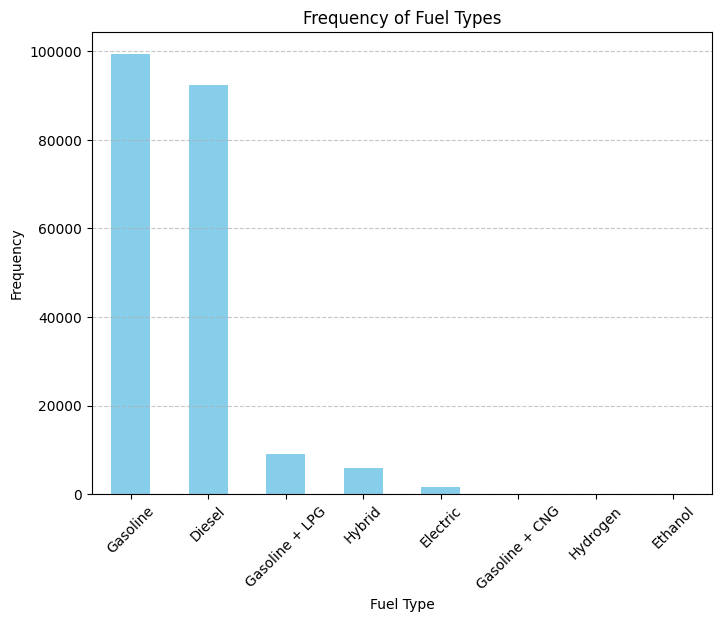

In [43]:
# Extract the 'Fuel_type' column
fuel_types = df['Fuel_type']

# Count the frequency of each fuel type
fuel_counts = fuel_types.value_counts()

# Plot histogram of fuel type frequencies
plt.figure(figsize=(8, 6))
fuel_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Statistical tests

# Parametric Tests

# Perform t-tests for means comparison

In [44]:
from scipy.stats import ttest_ind

# Select two groups for comparison (e.g., BMW and Mercedes)
group1 = df[df['Vehicle_brand'] == 'BMW']['Price']
group2 = df[df['Vehicle_brand'] == 'Mercedes']['Price']

# Perform t-test
t_stat, p_value = ttest_ind(group1, group2)

# Print the results
print('T-statistic:', t_stat)
print('P-value:', p_value)

# Interpret the results
if p_value < 0.05:
    print('There is a significant difference in prices between BMW and Mercedes.')
else:
    print('There is no significant difference in prices between BMW and Mercedes.')


T-statistic: nan
P-value: nan
There is no significant difference in prices between BMW and Mercedes.


Perform Single Sample t-test

In [45]:
from scipy.stats import ttest_1samp

# Assuming df is your dataframe with a column like 'Price'

# Select the sample for comparison (e.g., 'Price' column)
sample = df['Price']

# Assumed population mean for comparison
population_mean = 10000  # Change this to the desired population mean value

# Perform one-sample t-test
t_statistic, p_value = ttest_1samp(sample, population_mean)

# Print the results
print('T-statistic:', t_statistic)
print('P-value:', p_value)

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print('Reject the null hypothesis: The sample mean is significantly different from the population mean.')
else:
    print('Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.')


T-statistic: 279.41423785778545
P-value: 0.0
Reject the null hypothesis: The sample mean is significantly different from the population mean.


Perform Paired t-test

In [46]:
from scipy.stats import ttest_rel

# Assuming df is your dataframe with columns representing paired samples

# Select the paired samples for comparison
# For example, if your DataFrame has columns 'measurement1' and 'measurement2'
paired_sample1 = df['Index']
paired_sample2 = df['Price']

# Perform paired t-test
t_statistic, p_value = ttest_rel(paired_sample1, paired_sample2)

# Print the results
print('T-statistic:', t_statistic)
print('P-value:', p_value)

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant difference between the paired samples.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference between the paired samples.')


T-statistic: 169.5581522072571
P-value: 0.0
Reject the null hypothesis: There is a significant difference between the paired samples.


Perform  independent t-test

In [47]:
from scipy.stats import ttest_ind

# Assuming df is your dataframe with columns like 'Price' and 'Production_year'

# Select two independent groups for comparison
group1 = df[df['Production_year'] < 2000]['Price']
group2 = df[df['Production_year'] >= 2000]['Price']

# Perform independent t-test
t_statistic, p_value = ttest_ind(group1, group2)

# Print the results
print('T-statistic:', t_statistic)
print('P-value:', p_value)

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant difference in prices between cars produced before and after 2000.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference in prices between cars produced before and after 2000.')


T-statistic: -28.56731658362829
P-value: 3.807093457997347e-179
Reject the null hypothesis: There is a significant difference in prices between cars produced before and after 2000.


Perform Pearson correlation

In [48]:
# Assuming df is your dataframe with columns like 'Price' and 'Mileage_km'

# Calculate Pearson correlation coefficient
pearson_corr = df[['Price', 'Mileage_km']].corr(method='pearson')

# Print correlation matrix
print("Correlation Matrix:")
print(pearson_corr)

# Optionally, you can extract specific correlation values
# For example, correlation between 'Price' and 'Mileage_km'
price_mileage_corr = pearson_corr.loc['Price', 'Mileage_km']
print("\nPearson correlation between Price and Mileage_km:", price_mileage_corr)


Correlation Matrix:
               Price  Mileage_km
Price       1.000000   -0.017602
Mileage_km -0.017602    1.000000

Pearson correlation between Price and Mileage_km: -0.017601790683690045


#Perform ANOVA for means comparison.

In [49]:
from scipy.stats import f_oneway

# Assuming df is your dataframe with columns like 'Price' and 'Vehicle_brand'

# Select multiple groups for comparison (e.g., BMW, Mercedes, Audi)
group1 = df[df['Vehicle_brand'] == 'BMW']['Price']
group2 = df[df['Vehicle_brand'] == 'Mercedes']['Price']
group3 = df[df['Vehicle_brand'] == 'Audi']['Price']

# Perform ANOVA
f_stat, p_value = f_oneway(group1, group2, group3)

# Print the results
print('F-statistic:', f_stat)
print('P-value:', p_value)

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant difference in prices between at least two groups.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference in prices between the groups.')


F-statistic: nan
P-value: nan
Fail to reject the null hypothesis: There is no significant difference in prices between the groups.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


# Non-parametric Tests

Perform One-sample Wilcoxon signed-rank test

In [50]:
from scipy.stats import wilcoxon

# Assuming df is your dataframe with a column like 'Price'

# Select the sample for comparison (e.g., 'Price' column)
sample = df['Price']

# Assumed median for comparison
median_value = 10000  # Change this to the desired median value

# Perform one-sample Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sample - median_value)

# Print the results
print('Test statistic:', statistic)
print('P-value:', p_value)

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print('Reject the null hypothesis: The sample median is significantly different from the hypothesized median.')
else:
    print('Fail to reject the null hypothesis: The sample median is not significantly different from the hypothesized median.')


Test statistic: 527934909.5
P-value: 0.0
Reject the null hypothesis: The sample median is significantly different from the hypothesized median.


# Perform Mann-Whitney U test for distribution comparison

In [51]:
from scipy.stats import mannwhitneyu

# Assuming df is your dataframe with columns like 'Price' and 'Fuel_type'

# Select two groups for comparison (e.g., Diesel and Petrol cars)
group1 = df[df['Fuel_type'] == 'Diesel']['Price']
group2 = df[df['Fuel_type'] == 'Petrol']['Price']

# Check if groups have data points
if len(group1) > 0 and len(group2) > 0:
    # Perform Mann-Whitney U test
    u_stat, p_value = mannwhitneyu(group1, group2)

    # Print the results
    print('U-statistic:', u_stat)
    print('P-value:', p_value)

    # Interpret the results
    if p_value < 0.05:
        print('There is a significant difference in prices between Diesel and Petrol cars.')
    else:
        print('There is no significant difference in prices between Diesel and Petrol cars.')
else:
    print('One or both groups have no data points, unable to perform the Mann-Whitney U test.')

One or both groups have no data points, unable to perform the Mann-Whitney U test.


Perform 	Wilcoxon signed-rank test

In [52]:
from scipy.stats import wilcoxon

# Assuming df is your dataframe with a column like 'Price'

# Select the sample for comparison (e.g., 'Price' column)
sample = df['Price']

# Assumed median for comparison
median_value = 10000  # Change this to the desired median value

# Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(sample - median_value)

# Print the results
print('Test statistic:', statistic)
print('P-value:', p_value)

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print('Reject the null hypothesis: The sample median is significantly different from the hypothesized median.')
else:
    print('Fail to reject the null hypothesis: The sample median is not significantly different from the hypothesized median.')


Test statistic: 527934909.5
P-value: 0.0
Reject the null hypothesis: The sample median is significantly different from the hypothesized median.


# Perform Kruskal-Wallis test for distribution comparison

In [53]:
from scipy.stats import kruskal

# Assuming df is your dataframe with columns like 'Price' and 'Vehicle_brand'

# Select multiple groups for comparison (e.g., BMW, Mercedes, Audi)
group1 = df[df['Vehicle_brand'] == 'BMW']['Price']
group2 = df[df['Vehicle_brand'] == 'Mercedes']['Price']
group3 = df[df['Vehicle_brand'] == 'Audi']['Price']

# Perform Kruskal-Wallis test
h_stat, p_value = kruskal(group1, group2, group3)

# Print the results
print('H-statistic:', h_stat)
print('P-value:', p_value)

# Interpret the results
if p_value < 0.05:
    print('There is a significant difference in prices among BMW, Mercedes, and Audi.')
else:
    print('There is no significant difference in prices among BMW, Mercedes, and Audi.')


H-statistic: nan
P-value: nan
There is no significant difference in prices among BMW, Mercedes, and Audi.


Perform Spearman correlation:

In [54]:
# Assuming df is your dataframe with columns like 'Price' and 'Mileage_km'

# Calculate Spearman correlation coefficient
spearman_corr = df[['Price', 'Mileage_km']].corr(method='spearman')

# Print correlation matrix
print(spearman_corr)

# Optionally, you can extract specific correlation values
# For example, correlation between 'Price' and 'Mileage_km'
price_mileage_corr = spearman_corr.loc['Price', 'Mileage_km']
print("Spearman correlation between Price and Mileage_km:", price_mileage_corr)


              Price  Mileage_km
Price       1.00000    -0.67533
Mileage_km -0.67533     1.00000
Spearman correlation between Price and Mileage_km: -0.6753296610052083


# Feature Selection

In [56]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Car_sale_ads.csv.zip')

# Assuming 'Price' is the target variable you want to predict
target_variable = 'Price'

# Exclude non-numeric columns from DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation of all numeric features with the target variable
correlation_with_target = numeric_df.corr()[target_variable].abs().sort_values(ascending=False)

# Set a correlation threshold for feature selection
correlation_threshold = 0.5  # Adjust as needed

# Select features highly correlated with the target variable
selected_features = correlation_with_target[correlation_with_target >= correlation_threshold].index.tolist()

# Print selected features
print("Selected Features highly correlated with", target_variable, ":")
print(selected_features)

Selected Features highly correlated with Price :
['Price', 'Power_HP']


Perform feature selection using correlation analysis

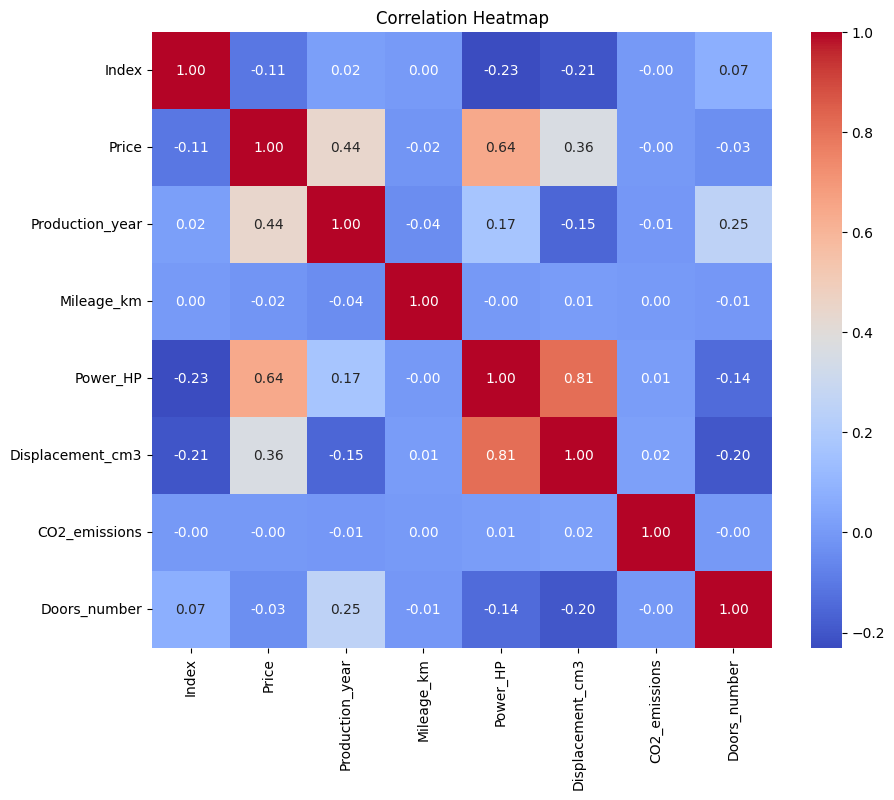

Highly Correlated Features:
          Feature 1         Feature 2  Correlation
2             Price          Power_HP     0.641298
5          Power_HP             Price     0.641298
7          Power_HP  Displacement_cm3     0.811457
8  Displacement_cm3          Power_HP     0.811457


In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Car_sale_ads.csv.zip')

# Exclude non-numeric columns from DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Filter features based on correlation coefficient threshold (e.g., 0.5)
threshold = 0.5
highly_correlated_features = corr_matrix[abs(corr_matrix) > threshold].stack().reset_index().rename(columns={'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation'})
highly_correlated_features = highly_correlated_features[highly_correlated_features['Feature 1'] != highly_correlated_features['Feature 2']]
print('Highly Correlated Features:')
print(highly_correlated_features)

Perform feature selection using mutual information

In [58]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('/content/Car_sale_ads.csv.zip')

# Define features and target variable
features = df[['Production_year', 'Mileage_km', 'Power_HP', 'Displacement_cm3']]
target = df['Price']

# Handle missing values by imputing with mean values
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Compute mutual information scores
mi_scores = mutual_info_regression(features_imputed, target)
mi_scores = pd.Series(mi_scores, name='Mutual Information Scores', index=features.columns)
mi_scores_sorted = mi_scores.sort_values(ascending=False)

print('Mutual Information Scores:')
print(mi_scores_sorted)


Mutual Information Scores:
Production_year     0.697091
Power_HP            0.528220
Displacement_cm3    0.506899
Mileage_km          0.409150
Name: Mutual Information Scores, dtype: float64


Perform feature selection using recursive feature elimination.

In [59]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('/content/Car_sale_ads.csv.zip')

# Define features and target variable
features = df[['Production_year', 'Mileage_km', 'Power_HP', 'Displacement_cm3']]
target = df['Price']

# Handle missing values by imputing with mean values
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Initialize model (e.g., Linear Regression)
estimator = LinearRegression()

# Perform recursive feature elimination (RFE)
rfe = RFE(estimator, n_features_to_select=2)  # Select the number of features to keep
rfe.fit(features_imputed, target)

# Selected features
selected_features = features.columns[rfe.support_]
print('Selected Features (RFE):')
print(selected_features)


Selected Features (RFE):
Index(['Production_year', 'Power_HP'], dtype='object')


# Model Selection

Perform model training and hyperparameter tuning

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming df contains the dataset and it's properly loaded

# Check for missing values and handle them if necessary
# For example, you can drop rows with missing values:
df.dropna(inplace=True)

# Define the feature matrix X and target variable y
X = df[['Mileage_km', 'Power_HP', 'Displacement_cm3','CO2_emissions']]
y = df['Price']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a pipeline with feature scaling and the model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regression', LinearRegression())
])

# Define the hyperparameters to tune
parameters = {
    'regression__fit_intercept': [True, False],
    'regression__positive': [True, False]
}

# Initialize the grid search with cross-validation
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='neg_mean_squared_error', verbose=1, error_score='raise')

# Perform the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding mean squared error
print('Best Hyperparameters:', grid_search.best_params_)
print('Best Negative Mean Squared Error:', grid_search.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Hyperparameters: {'regression__fit_intercept': True, 'regression__positive': False}
Best Negative Mean Squared Error: -1583396638.7217002


Perform model evaluation using cross-validation

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  # Import SimpleImputer for handling missing values

# Define the feature matrix X and target variable y
X = df[['Mileage_km', 'Power_HP', 'Displacement_cm3', 'CO2_emissions']]
y = df['Price']

# Initialize the StandardScaler and SimpleImputer
scaler = StandardScaler()
imputer = SimpleImputer(strategy='mean')  # Replace NaN values with the mean of each column

# Preprocess the features: Scale and impute missing values
X_scaled = scaler.fit_transform(X)
X_preprocessed = imputer.fit_transform(X_scaled)

# Define the best hyperparameters found during grid search
best_params = {'fit_intercept': True, 'positive': True}

# Train the best model with the best hyperparameters
best_model = LinearRegression(**best_params)
best_model.fit(X_preprocessed, y)

# Perform cross-validation to evaluate the model
cv_scores = cross_val_score(best_model, X_preprocessed, y, cv=5, scoring='neg_mean_squared_error')
rmse_cv_scores = [(-score)**0.5 for score in cv_scores]

# Print the cross-validation RMSE scores
print('Cross-Validation RMSE Scores:', rmse_cv_scores)
print('Mean RMSE:', sum(rmse_cv_scores) / len(rmse_cv_scores))

Cross-Validation RMSE Scores: [56474.91075011602, 33986.848817071295, 51622.14499049009, 47097.34917831378, 31417.156670557277]
Mean RMSE: 44119.682081309686


Perform model evaluation using holdout validation.

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer  # Import SimpleImputer for handling missing values

# Define the feature matrix X and target variable y
X = df[['Mileage_km', 'Power_HP', 'Displacement_cm3', 'CO2_emissions']]
y = df['Price']

# Initialize the StandardScaler and SimpleImputer
scaler = StandardScaler()
imputer = SimpleImputer(strategy='mean')  # Replace NaN values with the mean of each column

# Preprocess the features: Scale and impute missing values
X_scaled = scaler.fit_transform(X)
X_preprocessed = imputer.fit_transform(X_scaled)

# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Define the best hyperparameters found during grid search
best_params = {'fit_intercept': True, 'positive': True}

# Train the best model with the best hyperparameters on the training data
best_model = LinearRegression(**best_params)
best_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = best_model.predict(X_test)

# Calculate the RMSE on the testing set
rmse_holdout = mean_squared_error(y_test, y_pred, squared=False)

# Print the holdout validation RMSE
print('Holdout Validation RMSE:', rmse_holdout)


Holdout Validation RMSE: 42385.28262725688
